In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [3]:
import librosa
import librosa.display
import IPython.display as ipd

In [4]:
df = pd.read_csv("D:\\Project Working\\GTZAN\\genres\\genres_data.csv")
df.head()

,Folder_Name,File_Name,Class_ID,Class
0,blues,blues.00000.au,1,blues
1,blues,blues.00001.au,1,blues
2,blues,blues.00002.au,1,blues
3,blues,blues.00003.au,1,blues
4,blues,blues.00004.au,1,blues


In [5]:
class_name = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [7]:
df['Class'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: Class, dtype: int64

In [8]:
features = []
labels = []

def parser():
    # Function to load files and extract features
    for i in range(df.shape[0]):
        file_name = 'D:\\Project Working\\GTZAN\\genres\\' + str(df["Folder_Name"][i]) + '\\' + df["File_Name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        data, sr = librosa.load(file_name, res_type='kaiser_fast') 
        mels = np.mean(librosa.feature.melspectrogram(y = data, sr = sr), axis=1)        
        features.append(mels)
        labels.append(df["Class_ID"][i])

    return features, labels

In [9]:
x, y = parser()

In [10]:
X = np.array(x)
Y = np.array(y)

print(X.shape)
print(Y.shape)

(1000, 128)
(1000,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((750, 128), (750,), (250, 128), (250,))

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
forest = RandomForestClassifier()

# fit classifier to training set
forest.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
y_pred=forest.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[19,  0,  3,  1,  0,  0,  1,  0,  1,  1],
       [ 0, 19,  4,  0,  0,  1,  0,  0,  0,  1],
       [ 1,  1,  6,  4,  2,  2,  1,  0,  1,  3],
       [ 1,  0,  0, 15,  3,  0,  2,  1,  0,  2],
       [ 0,  0,  1,  1, 13,  1,  1,  3,  5,  0],
       [ 0,  2,  3,  0,  2, 20,  0,  0,  0,  4],
       [ 1,  0,  0,  0,  2,  0, 20,  0,  0,  2],
       [ 0,  0,  0,  0,  6,  1,  0, 15,  1,  1],
       [ 2,  0,  1,  2,  3,  2,  0,  1, 11,  1],
       [ 3,  0,  3,  4,  3,  0,  4,  1,  1,  7]], dtype=int64)

In [16]:
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.5800


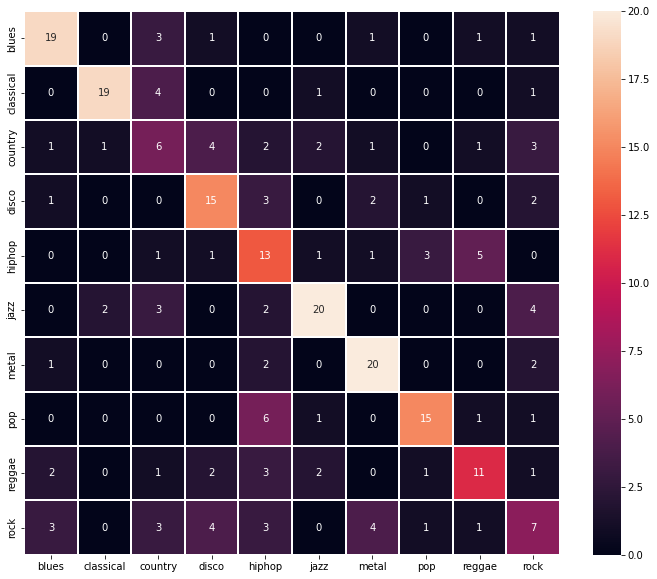

In [17]:
plt.figure(figsize = (12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot = True, linewidths = 2, fmt="d", 
            xticklabels = class_name,
            yticklabels = class_name)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined